In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/nature_cancer_building_blocks_analysis'

In [2]:
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pickle
from src.utils.visualization import plot_cells_positions, plot_all_tumors_cell_positions
from src.CellsImage import CellsImage 
from src.utils.equations import color_mapper

In [3]:
#[ 88, 428, 357, 389, 303, 445, 374,  33, 549, 537, 477, 393, 429,
#       329, 443, 305, 105, 469, 555, 532,   6,  40, 415,   7, 221,
#        10, 395, 494, 332, 409,  87, 479, 359,  36, 265, 273, 229, 261,
#       184, 181, 521, 102, 468, 509,  92,  94, 331, 260, 250, 233, 234,
#       236, 231, 170, 365, 175, 154,  19, 132,  98,  58,  61,  16,  63,
#       432, 361, 263, 426, 366,  35, 340,   1, 336]
patientID = 184

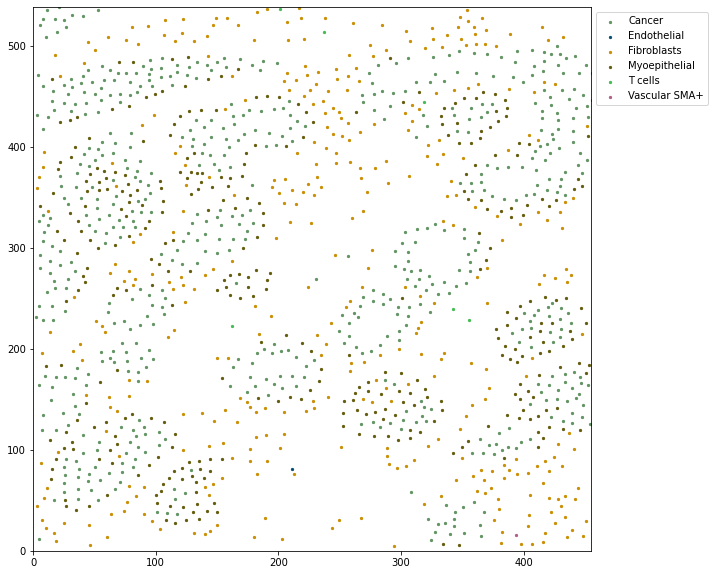

In [10]:
patientID = 332
CELL_TYPES = ['Fibroblasts', 'Endothelial', 'T cells', 'B cells', 'Cancer', 'Vascular SMA+', 'Myoepithelial', 'Macrophages']
cell_data = pd.read_csv("../../../output/tnbc_nature_cancer_dataset/patient{}_cell_positions.csv".format(patientID))
plot_cells_positions(cell_data, CELL_TYPES, to_plot = 'all', h=cell_data['size_y'][0], w=cell_data['size_x'][0])

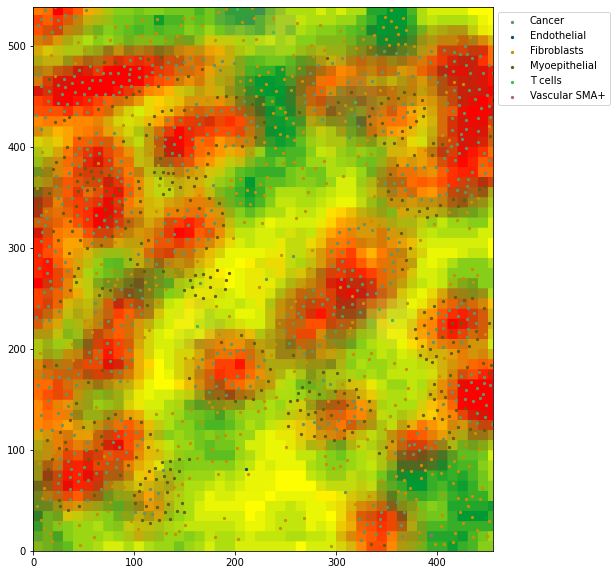

In [11]:
patientID = 332
GRANULARITY = 10
RADIUS = 25
cell_data = pd.read_csv("../../../output/tnbc_nature_cancer_dataset/patient{}_cell_positions.csv".format(patientID))

with open("pca_3d_nature_gauss", "rb") as f:
    pca_3d = pickle.load(f)

with open("AA_3D_nature_gauss", "rb") as f:
    AA_3D = pickle.load(f)

plot_cells_positions(cell_data, CELL_TYPES, segment_image=True, segmentation_type='rgb',
                     h=cell_data['size_y'][0], w=cell_data['size_x'][0], granularity=GRANULARITY, pca_obj=pca_3d, 
                     AA_obj=AA_3D, to_plot = 'all', radius=RADIUS)   

In [8]:
patient_ids = [ 88, 428, 357, 389, 303, 445, 374,  33, 549, 537, 477, 393, 429, 
               329, 443, 305, 105, 469, 555, 532,   6,  40, 415,   7, 221, 
               10, 395, 494, 332, 409,  87, 479, 359,  36, 265, 273, 229, 261, 
               184, 181, 521, 102, 468, 509,  92,  94, 331, 260, 250, 233, 234, 
               236, 231, 170, 365, 175, 154,  19, 132,  98,  58,  61,  16,  63, 
               432, 361, 263, 426, 366,  35, 340,   1, 336]

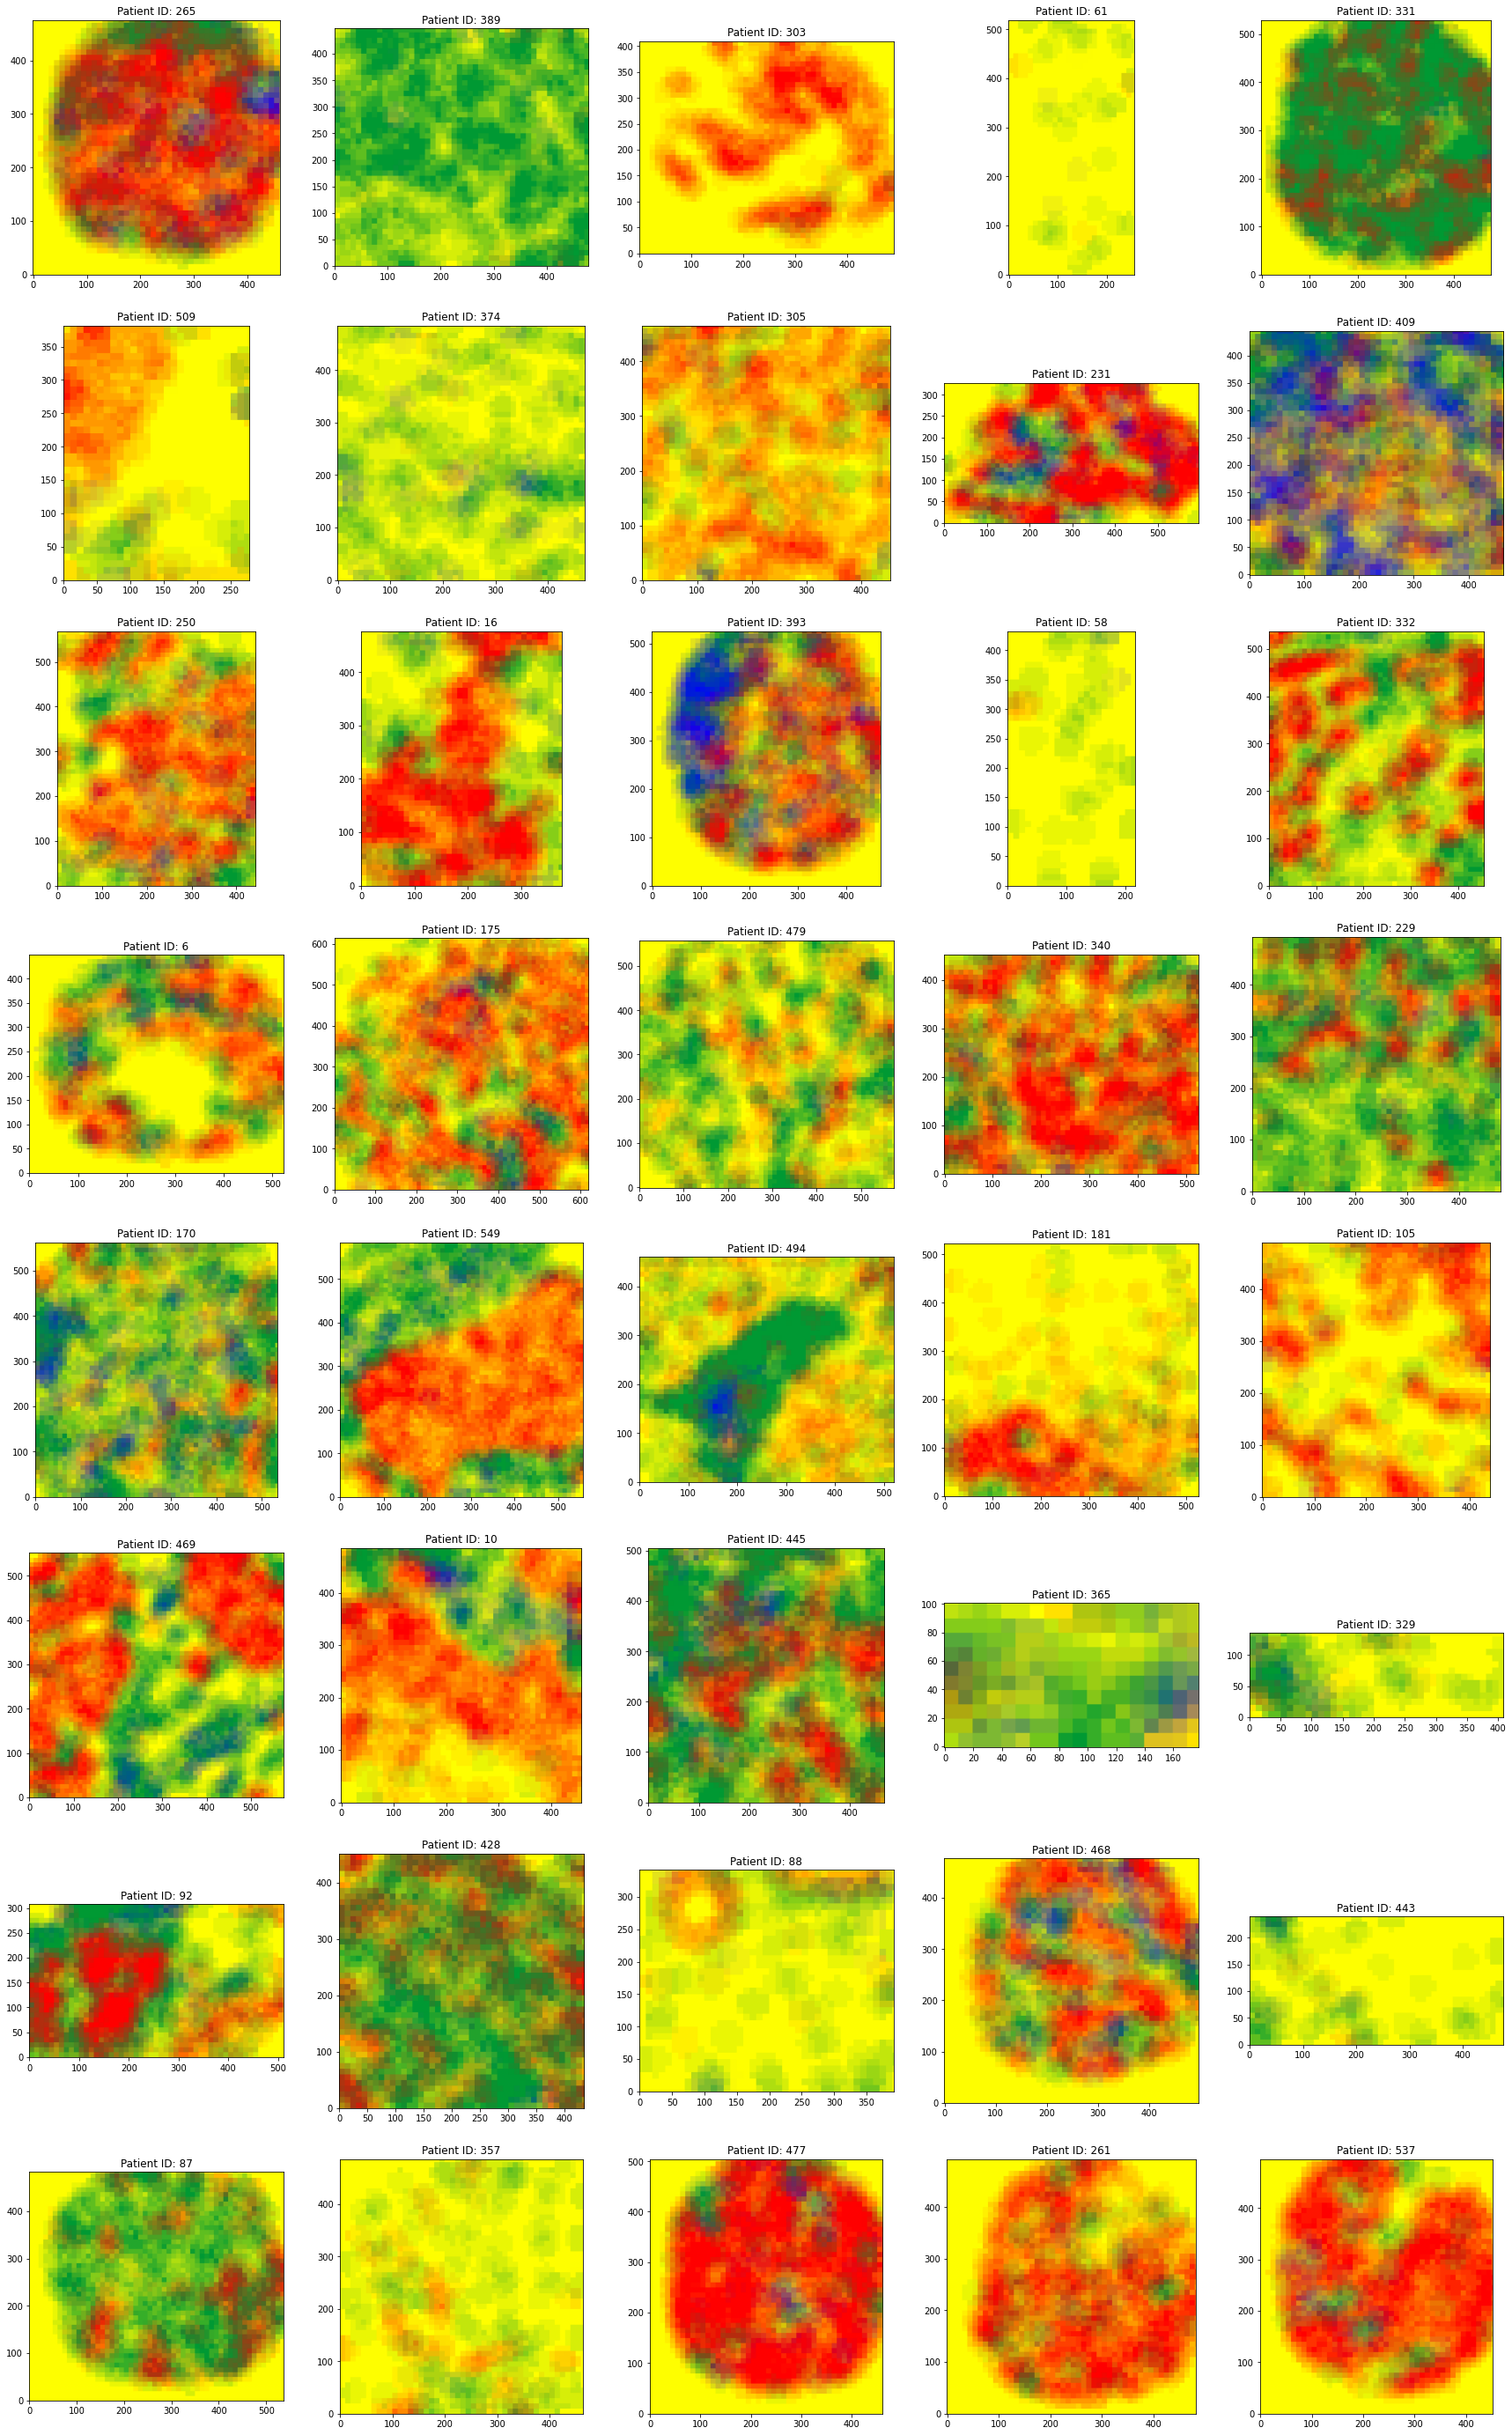

In [9]:
import random
reduced_patient_ids = random.sample(patient_ids, 40)
ROOT_DATA_PATH = "../../../output/tnbc_nature_cancer_dataset/"

plot_all_tumors_cell_positions(reduced_patient_ids, CELL_TYPES, segment_image=True, segmentation_type='rgb', radius=RADIUS,
                               granularity=GRANULARITY, pca_obj=pca_3d, AA_obj=AA_3D, to_plot = [], root_path=ROOT_DATA_PATH)